In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import tkinter as tk
import os
from tkinter import filedialog
import sys
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
education = pd.read_csv(file)

In [ ]:
# First Moment Business Decision: Mean Median, Mode

print('The mean Workexp is {0}, The Median workexp is {1}, The Mode of Workexp is {2}'.format(education.workex.mean(),education.workex.median(),education.workex.mode()))

In [ ]:
# Second Moment Business Decision: The measures of dispersion: Variance, Standard Deviance and Range

print('The Variance of the work Experience is {0}, Standard deviation is {1} and range is {2}'.format(education.workex.var(),education.workex.std(),(max(education.workex)-min(education.workex))))

In [ ]:
# Third Moment Business Decision : Skewness

print('The Skewness of Workexp is {0} and the skewness of GMAT is {1}'.format(education.workex.skew(),education.gmat.skew()))

# -ve skewness value indicates it is a left tailed or left skewed
# +ve skewness indicate it is a right tailed distribution or right skewed.

In [ ]:
# Fourth Moment of Business: Kurtosis

print('The Skewness of Workexp is {0} and the skewness of GMAT is {1}'.format(education.workex.kurt(),education.gmat.kurt()))

# Positive value in Kurtosis indicate a narrow peak
# Negative valued kurtosis indicate a wider peak.

<h3>Data Visualization </h3>

In [ ]:
education.shape # Gives the shape of the data. i.e.,  number of rows and columns

In [ ]:
plt.bar(height=education.gmat,x=np.arange(1,774,1)); 
# By ending the Plot quote with ';' We can elminate the test generated above the plot.
# Generating a bar chart with each value in the row as a bar, representing GMAT scores on Y-axis and arranged numbers from 1 to 774 in increment of 1 on X-axis

In [ ]:
plt.hist(education.gmat);

# Histogram of GMAT scores

In [ ]:
plt.boxplot(education.gmat);

# Boxplot for the GMAT Scores

In [ ]:
# Generating a Quantile Quantile plot to check if the data is normally distributed or not

import pylab
stats.probplot(education.gmat,dist='norm',plot=pylab) # from scipy stats library was imported already

In [ ]:
stats.probplot(education.workex,dist='norm',plot=pylab)

In [ ]:
# The data looks like exponential distribution. So, applying Log transformation
stats.probplot(np.log(education.workex),dist='norm',plot=pylab)

<h2><b>Data Preprocessing

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic diversity Dataset from EDA_Dataset folder
df = pd.read_csv(file)

<b> Typecasting data

In [ ]:
#Converting the Salaries into int64 format
print(df.dtypes)
df.Salaries=df.Salaries.astype('int64')
print('The updated data  type of Salies is {}'.format(df.Salaries.dtype))
a= df.age.dtypes
df.age=df.age.astype('float32')
print('The initial data type for age is {0}. The updated data type of age now is {1}'.format(a,df.age.dtypes))

<b>Identifying and removing duplicates in the data

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic mtcars_dup from EDA_Dataset folder
df = pd.read_csv(file)

In [ ]:
duplicate =df.duplicated() # Creates a Series filled with True or False if the row is a duplicate or not
sum(duplicate) # Returns the total number of duplicates
sum(df.cyl.duplicated())# Returns the number of duplicated values in the column cyl
## Removing the duplcates ##
df =df.drop_duplicates() # Drops the Duplicated rows
sum(df.duplicated())# Checking for duplicates after dropping the duplicates

<b>Outlier Treatment

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic diversity dataset from EDA_Dataset folder
df = pd.read_csv(file)

In [ ]:
# Findout the outliers in Salaries Column.
sns.boxplot(x=df.Salaries);

In [ ]:
## Alpha Trimming ##
# A column can be either referred as dataframe[column] or dataframe.column
IQR=df['Salaries'].quantile(0.75)-df.Salaries.quantile(0.25) # Calculating the Inter Quantile range Q3-Q1
lower_limit=df['Salaries'].quantile(0.25)-(IQR*1.5)
upper_limit=df['Salaries'].quantile(0.75)+(IQR*1.5)

# Alpha-Trimming
outliers=np.where(df.Salaries>upper_limit,True,np.where(df.Salaries<lower_limit,True,False))
df_trimmed=df.loc[~(outliers),]
print(df.shape)
print(df_trimmed.shape)
sns.boxplot(x=df_trimmed.Salaries);

In [ ]:
## Winsorization ##
# Replacing the outlier values with the border value i.e., Q3+IQR*1.5 and Q1-IQR*1.5
df['Modified_Sal']= pd.DataFrame(np.where(df.Salaries>upper_limit,upper_limit,np.where(df.Salaries<lower_limit,lower_limit,df.Salaries)))
print(df.shape)
sns.boxplot(x=df.Modified_Sal);

In [ ]:
# Alternatively we can use winsorizer function from feature_engine
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['Salaries'])
df_t=winsor.fit_transform(df[['Salaries']])
sns.boxplot(x=df_t.Salaries);

<b>Zero Variance and Near zero variance

In [ ]:
df.var()
# If the Variance of the data in a column is Zero or near zero, we cannot do any statistical analysis>Hence we can ignore that feature for further analysis

<b>Missing values imputation

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import modified ethnic dataset from EDA_Dataset folder
df = pd.read_csv(file)

In [ ]:
df.isna().sum() # Checking the Missing values in each column

In [ ]:
# Mean imputer
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(strategy='mean')
df.Salaries=pd.DataFrame(mean_imputer.fit_transform(df[['Salaries']]))
print('The Na values in the Salaries column now is {0}'.format(df.Salaries.isna().sum()))

# Median imputation
median_imputer=SimpleImputer(strategy='median')
df['age']=pd.DataFrame(median_imputer.fit_transform(df[['age']]))
print('The Na values in the age column now is {0}'.format(df.age.isna().sum()))

# Mode imputation
mode_imputer=SimpleImputer(strategy='most_frequent')
df['Sex']=pd.DataFrame(mode_imputer.fit_transform(df[['Sex']]))
print('The Na values in the Sex column now is {0}'.format(df.Sex.isna().sum()))

<b>Dummy variable creation

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic diversity dataset from EDA_Dataset folder
df = pd.read_csv(file)

In [ ]:
df.columns # Gives all the column names
df.shape  # Gives the number of rows and no.of columns in a dataframe.
df.drop(['Employee_Name','EmpID','Zip'],axis=1,inplace=True) # Dropping specified columns. Inplace =True means in memory only
df.dtypes


In [ ]:
# creating dummy variables for all categorical columns
df_new=pd.get_dummies(df)
df_new1=pd.get_dummies(df,drop_first=True)# creating dummies after dropping the first category

In [ ]:
## One hot Encoding ##
df=df[['Salaries','age','Position','State','Sex','MaritalDesc','CitizenDesc','EmploymentStatus','Department','Race']] #Creating a df with selected columns in specific order.
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()  # Initializing the method with default arguements
enc_df=pd.DataFrame(enc.fit_transform(df.iloc[:,2:]).toarray())


In [ ]:
## Label Encoding ##
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder() # Initializing the method with default arguements
# Splitting the data into Output and Input Variables
# The splitting is optional and not mandatory in data cleaning. But we do this for Machine Learning
X=df.iloc[:,:9]
y=df['Race']
X['Sex']=label.fit_transform(X['Sex'])
X['MaritalDesc']=label.fit_transform(X['MaritalDesc'])
X['CitizenDesc']=label.fit_transform(X['CitizenDesc'])
y=label.fit_transform(y)# Creates an array of numbers
y=pd.DataFrame(y)
df_new2=pd.concat([X,y],axis=1)# Appends the y column as column name'0' in the end
df_new2=df_new2.rename(columns={0:'Type'}) # Renaming the y column as 'Type'

<b>Standardization and Normalization

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import mtcars dataset from EDA_Dataset folder
df = pd.read_csv(file)


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# Initializing the scaler with default arguements
data=pd.DataFrame(scaler.fit_transform(df))
data.describe()

In [ ]:
#Normalization
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import Ethinc diversity dataset from EDA_Dataset folder
df = pd.read_csv(file)
df.drop(['Employee_Name','EmpID','Zip'],axis=1,inplace=True)
df=pd.get_dummies(df,drop_first=True)

In [ ]:

# Writing a custom function to calculate the Normalized values
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

df_norm=norm_func(df)
df_norm.describe()

<h2><b>Unsupervised learning</h2>

<h3>Hierarchical CLustering

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
# Import the University_Clustering data from Hierarchical_clustering
df = pd.read_excel("C:\\Study\\aispry\\aispry\\Data\\Hierarchical_clustering\\University_Clustering.xlsx")
# Dropping the State Column
df.drop(['State'],axis=1,inplace=True)
# Writing a custom function to calculate the Normalized values
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)
# Normalizing all values except the University name
df_norm=norm_func(df.iloc[:,1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


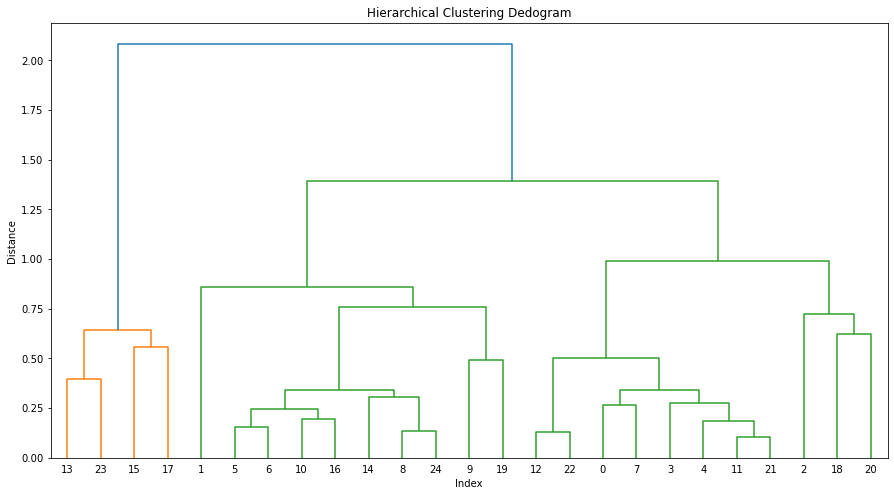

In [33]:
# Creating a Dendogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_norm,method='complete',metric='euclidean') # Creates an array of the euclidean distances based on complete linkage
#Dendogram
plt.figure(figsize=(15,8)); # Defining the length and height of the diagram
plt.title('Hierarchical Clustering Dedogram');
plt.xlabel('Index');
plt.ylabel('Distance');
sch.dendrogram(z,
    leaf_rotation=0,  #Rotates the X axis label
    leaf_font_size=10 #Font size for the x axis labels
)
plt.show()


In [34]:
# Now Apply Agglomerative clustering choosing 3 clusters in the above dendogram
from sklearn.cluster import AgglomerativeClustering
h_complete =AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(df_norm)
h_complete.labels_ # This gives the array of Label values based on the index values
cluster_labels = pd.Series(h_complete.labels_) # converting the array to Pandas series
df['clust']=cluster_labels # adding a column to the dataframe
df=df.iloc[:,[7,0,1,2,3,4,5,6]] # Re-arranging the columns. If the cell is run multiple times it rearranges randomly
df.head()
# Getting the aggregate values of the cluster
df.iloc[:,2:].groupby(df.clust).mean()
# Exporting the data to a CSV File
df.to_csv("University.csv",encoding="utf-8")


<h3><b>K-Means CLustering

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
X = np.random.uniform(0,1,50) # Creates an array of 50 Uniformly distributed Random values between 0 and 1
Y = np.random.uniform(0,1,50) # Creates an array of 50 Uniformly distributed Random values between 0 and 1
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y

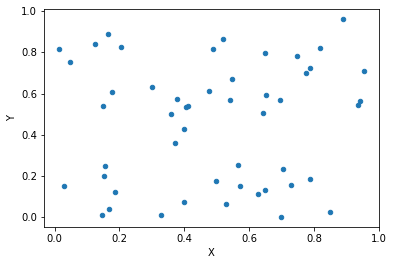

In [2]:
# Creating a scatter plot using the two variables X and Y
df_xy.plot(x="X",y="Y",kind="scatter");

In [3]:

model1 = KMeans(n_clusters=3).fit(df_xy)

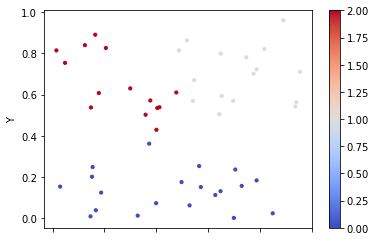

In [12]:
import matplotlib.pyplot as plt
df_xy.plot(x = "X",# Defining the X variable
  y = "Y",  # Defining the Y variable
  c = model1.labels_, # Specifying to color the various labels
  kind = 'scatter', # Specifying the type of plot
  s = 10, # Number of levels in colors end to end
  cmap=plt.cm.coolwarm # cm -> color map: coolwarm
  );

In [13]:
# K means clustering on the university datset
# Import the University_Clustering data from Hierarchical_clustering
df = pd.read_excel("C:\\Study\\aispry\\aispry\\Data\\Hierarchical_clustering\\University_Clustering.xlsx")
# Dropping the State Column
df.drop(['State'],axis=1,inplace=True)
# Writing a custom function to calculate the Normalized values
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)
# Normalizing all values except the University name
df_norm=norm_func(df.iloc[:,1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


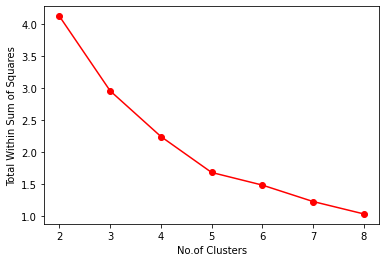

In [26]:
## Preparing a Elbow curve or Scree plot ##
twss=[]
k=list(range(2,9))
# Writing down a function to append the Total Within Sum of Squares distance for various no. of clusters (2-9) and create a list
for i in k:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_norm)
  twss.append(kmeans.inertia_) # Inertia_ gives the TOtal Within sum of Squares distance in the kmeans object

type(twss) # Gives the type of the vriable
plt.plot(k,twss,'ro-');plt.xlabel("No.of Clusters");plt.ylabel("Total Within Sum of Squares");

In [29]:
univ_model = KMeans(n_clusters=3).fit(df_norm)
cluster_label = pd.Series(univ_model.labels_)# converting the array to Pandas series
df['Cluster Label'] = cluster_label 
cols =['Cluster Label','Univ','SAT','Top10','Accept','SFRatio','Expenses','GradRate'] # Creating a list of columns in the order we want using the names rather than indices
df = df[cols] # Re-arring the columns using the cols label
df.iloc[:,2:8].groupby(df["Cluster Label"]).mean() # Looking at the Cluster averages.
df.to_csv("Kmeans_clustering.csv",encoding='utf-8')

<h4><b> Association rules

In [3]:
# Install the package 'mlxtend' to implement apriori algorithm
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [17]:
# Our Dataset is not in a organized way. So, we shall parse the data carefully.
groceries=[]# creating and empty list
with open ("C:\\Users\\jamit\\Desktop\\Aispry\\Data\\Groceries\\groceries.csv") as f:
  groceries=f.read()
# groceries is a single string right now
# all the data is now stored in the groceries object. Now splitting the rows based on /n marker
groceries=groceries.split('/n') # Creates a list of lines with entire text in the line as a string 
# Now split the columns based on ','sperator
groceries_list=[]
for i in groceries: # i.e., for each line in groceries 
  groceries_list.append(i.split(",")) # Creates a list of lines with list of coma seperated values
all_groceries_list=[i for item in groceries_list for i in item] # Creating the list of items in a single list instead of looped list
from collections import Counter # Ordered dictionary
item_freq =Counter(all_groceries_list) # Creates a Dictonary of items and their frequency
item_freq = sorted(item_freq.items(),key = lambda x:x[1])
# Storing the frequencies and items in seperate variables
frequencies = list(reversed([i[1] for i in item_freq]))
items = list(reversed([i[0] for i in item_freq]))

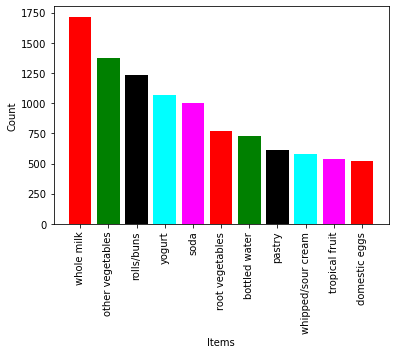

In [26]:
import matplotlib.pyplot as plt
#Bar plot for top 10 items
plt.bar(height=frequencies[0:11],x=list(range(0,11)),color=['red','green','black','cyan','magenta']);
plt.xticks(list(range(0,11),),items[0:11],rotation=90);
plt.xlabel("Items");
plt.ylabel("Count");

In [30]:
# Creating a dataframe for the transactions data
groceries_series=pd.DataFrame(pd.Series(groceries_list))
groceries_series=groceries_series.iloc[:9835,:] # Removing the empty transaction in the end
type(groceries_series)

pandas.core.frame.DataFrame

In [32]:
groceries_series.columns=["transactions"]
X =groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*');